<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-получение-основной-информации-о-них" data-toc-modified-id="Загрузка-данных-и-получение-основной-информации-о-них-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и получение основной информации о них</a></span></li><li><span><a href="#Решение-задач" data-toc-modified-id="Решение-задач-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Решение задач</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Задача" data-toc-modified-id="Задача-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Задача" data-toc-modified-id="Задача-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Задача" data-toc-modified-id="Задача-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Задача" data-toc-modified-id="Задача-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Задача</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Анализ базы данных  сервиса для чтения книг по подписке

Компания купила крупный сервис для чтения книг по подписке. В будущем хочет создать приложения для тех, кто любит читать.  

**Цель** — проанализировать базу данных. В ней информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.


**Описание данных**

**Таблица `books`**
Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**
Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**
Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**
Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**
Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

**Задания**

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

## Загрузка данных и получение основной информации о них

In [1]:
# Импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * 
           FROM books'''

con=engine.connect()
books = pd.io.sql.read_sql(query, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * 
            FROM authors'''

con=engine.connect()

authors = pd.io.sql.read_sql(sql=text(query), con = con)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [7]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * 
            FROM publishers'''

con=engine.connect()

publishers = pd.io.sql.read_sql(sql=text(query), con = con)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [9]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * 
            FROM ratings'''

con=engine.connect()

ratings = pd.io.sql.read_sql(sql=text(query), con = con)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [11]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * 
            FROM reviews'''

con=engine.connect()

reviews = pd.io.sql.read_sql(sql=text(query), con = con)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


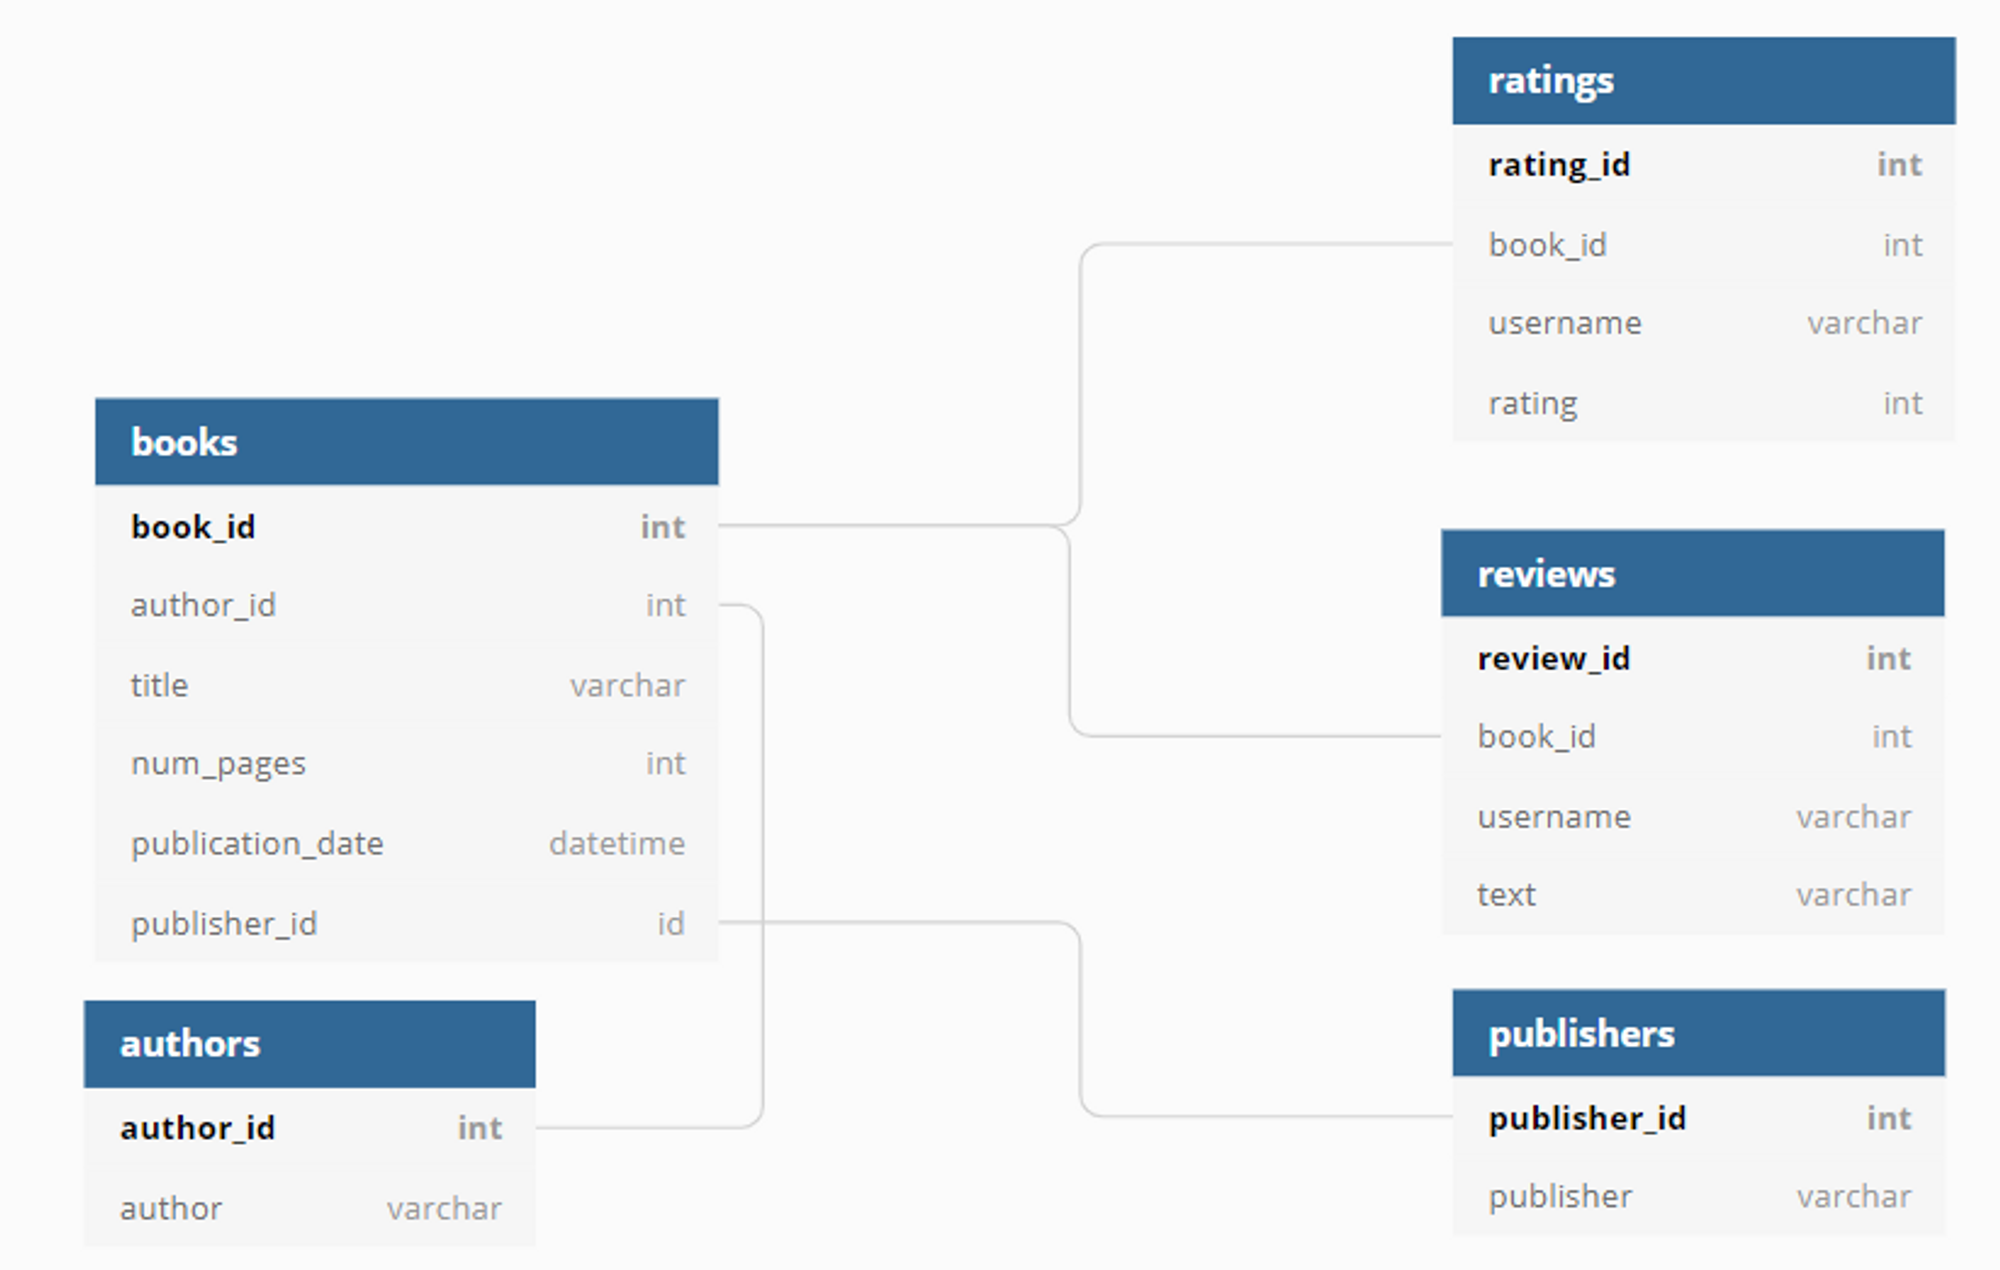

## Решение задач

### Задача  
Посчитайте, сколько книг вышло после 1 января 2000 года.
* Для решения задачи нужна одна таблица books и ее поля с id книги (book_id) и датой выпуска (publication_date)

In [13]:
query = '''
            SELECT COUNT(book_id) count_of_books
            FROM books 
            WHERE publication_date > '01-01-2000'
        '''
pd.io.sql.read_sql(query, con = engine)

,count_of_books
0,819


**Промежуточнй вывод:** После 1 января 2000 года вышло 819 книг.

### Задача  
Для каждой книги посчитайте количество обзоров и среднюю оценкую
* Для решения задача нужен список книг book_id, title из таблицы books, количество обзоров review_id для каждого book_id из таблицы reviews и средний ratings_id для каждого book_id из таблицы ratings.

In [14]:
query = ''' WITH
            rev AS 
                (SELECT book_id, COUNT(review_id) as count
                FROM reviews
                GROUP BY book_id
                 ),
                 
            rat AS 
                (SELECT book_id, AVG(rating) as avg
                FROM ratings
                GROUP BY book_id)
                
            SELECT b.title, rat.book_id, rev.count, rat.avg
            FROM rev FULL JOIN rat ON rev.book_id=rat.book_id
            LEFT JOIN books as b ON b.book_id=rev.book_id
        '''
pd.io.sql.read_sql(query, con = engine)

,title,book_id,count,avg
0,'Salem's Lot,1,2.0,3.666667
1,1 000 Places to See Before You Die,2,1.0,2.500000
2,13 Little Blue Envelopes (Little Blue Envelope...,3,3.0,4.666667
3,1491: New Revelations of the Americas Before C...,4,2.0,4.500000
4,1776,5,4.0,4.000000
...,...,...,...,...
995,Wyrd Sisters (Discworld #6; Witches #2),996,3.0,3.666667
996,Xenocide (Ender's Saga #3),997,3.0,3.400000
997,Year of Wonders,998,4.0,3.200000
998,You Suck (A Love Story #2),999,2.0,4.500000


**Промежуточнй вывод:** В таблице сгруппированной таблице reviews получилось на 6 строк меньше, чем в сгруппированной таблице ratings. Объединили эти таблице методом FULL JOIN, чтоб вошли все строки, так же методом LEFT JOIN присоединили названия фильмов из таблицы books. Количество обзоров варьируется от 1 до 7, средняя оценка варьируется от 1.5 до 5.

### Задача  
Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры.
* Для решения задачи нужна из таблицы books отобрать по полю num_pages книги толще 50стр. 

In [15]:
query = ''' WITH
            b AS 
                (SELECT publisher_id, COUNT(book_id)
            FROM books
            WHERE num_pages>50
            GROUP BY publisher_id
            ORDER BY COUNT(book_id) DESC 
                 )
                
            SELECT publisher
            FROM publishers
            WHERE publisher_id in (SELECT publisher_id FROM b LIMIT 1)
        '''
pd.io.sql.read_sql(query, con = engine)

,publisher
0,Penguin Books


In [16]:
query = '''
            SELECT b.publisher_id, p.publisher, COUNT(book_id)
            FROM books b
            JOIN publishers p ON b.publisher_id = p.publisher_id
            WHERE num_pages > 50
            GROUP BY b.publisher_id, p.publisher
            ORDER BY COUNT(book_id) DESC
            LIMIT 1
        '''
pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher,count
0,212,Penguin Books,42


**Промежуточнй вывод:** Издательство Penguin Books выпустило больше всего книг, толще 50 страниц из нашей базы данных. Два варианта решения, на мой взгляд достаточно первого по условиям вопроса задачи, но вдруг нужна вся информация, тогда второй вариант.

### Задача  
Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.
* Для решения задачи создадим временную таблицу с, в которую попадут книги с 50 и более оценками. Затем посчитаем среднюю оценку, сгруппировав по авторам книг и оставим только автора с самой выскокй оценкой книг.

In [17]:
query = '''
            WITH
            c AS 
                (SELECT b.book_id, r.rating_id, r.rating, b.author_id 
                FROM books b LEFT JOIN ratings r ON b.book_id=r.book_id
                WHERE b.book_id IN(SELECT book_id
                            FROM ratings
                            GROUP BY book_id
                            HAVING COUNT(rating_id) >= 50
                            ))
            SELECT a.author, AVG(c.rating)
            FROM c LEFT JOIN authors as a ON c.author_id=a.author_id
            GROUP BY a.author
            ORDER BY AVG(c.rating) DESC 
            LIMIT 1
        '''
pd.io.sql.read_sql(query, con = engine)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097


**Промежуточнй вывод:** Найден автор и иллюстратор книг с самой высокой средней оценкой книг - это Дж.К. Роулинг -  британская писательница, сценаристка и кинопродюсер, наиболее известная как автор серии романов о Гарри Поттере и Мэри Грандпре — американский иллюстратор и писатель, наиболее известный своими иллюстрациями изданий книг о Гарри Поттере. 

### Задача  
Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.
* Будем использовать подзапросы. В первом подзапросе отберем имена пользователей. который поставили больше 48 оценок. Далее возьмем только те имена, которые попали в предыдущий подзапрос и посчиатем количество обзоров этих пользователей. Далее посчитаем среднее количеств обзоров для отобранных пользователей.

In [18]:
query = '''
            SELECT AVG(rev_count)
            FROM (SELECT username, COUNT(review_id) as rev_count
                  FROM reviews
                  GROUP BY username
                  HAVING username IN (SELECT username
                                    FROM ratings 
                                    GROUP BY username
                                    HAVING COUNT(rating_id) > 48)) as avg_rev
               
        '''
pd.io.sql.read_sql(query, con = engine)

,avg
0,24.0


**Промежуточнй вывод:** Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок равно 24.

## Вывод

Нам были даны таблицы с информацией о книгах, издательствах, авторах, оценках книг и пользовательских обзорах книг: books - 1000 строк, authors - 636, publishers - 340, rating - 6456, reviews - 2793.

В рамках проекта необходимо было решить 5 задач:
1. Посчитайте, сколько книг вышло после 1 января 2000 года
    * После 1 января 2000 года вышло 819 книг.
2. Для каждой книги посчитайте количество обзоров и среднюю оценку
    * Количество обзоров варьируется от 1 до 7, средняя оценка варьируется от 1.5 до 5. 
3. Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры
    * Издательство Penguin Books выпустило больше всего книг, толще 50 страниц из нашей базы данных.
4. Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками
    * Автор с самой высокой средней оценкой книг - это Дж.К. Роулинг и Мэри Грандпре — автор и иллюстратор книг о Гарри Поттере. 
5. Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок
    * Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок равно 24.